##**Proyek Akhir :  Image Classification Model Deployment**

###Nama : Muhammad Ridho Abdillah
###Email : ridhoabdi101@gmail.com
###Kelas : Dicoding - Belajar Pengembangan Machine Learning

###Import Library

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential

### Download Dataset
Dataset yang digunakan dari situs Kaggle yang berjudul Animal Image Dataset. berikut adalah link dataset yang digunakan pada proyek ini: https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

In [70]:
!pip install kaggle

In [71]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadridho18","key":"4a7340d74e24d64c3ef6477b4332b07d"}'}

In [72]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [73]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

100% 374M/376M [00:17<00:00, 24.1MB/s]
100% 376M/376M [00:17<00:00, 22.2MB/s]


In [74]:
import zipfile,os
local_zip = 'animal-image-datasetdog-cat-and-panda.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

###Split Dataset (Training 80% dan Validation 20%)

In [75]:
!pip install split_folders

In [76]:
import splitfolders
splitfolders.ratio('tmp/animals/animals', output="tmp/animals/data", seed=1337, ratio=(.8, .2))

Copying files: 3000 files [00:00, 3958.68 files/s]


###Membuat Direktori Data Training dan Data Validation

In [77]:
base_dir = 'tmp/animals/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('tmp/animals/data/train')
os.listdir('tmp/animals/data/val')

['cats', 'panda', 'dogs']

In [78]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')
train_panda_dir = os.path.join(train_dir, 'panda')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_panda_dir = os.path.join(validation_dir, 'panda')

###Proses Augmentasi Gambar dengan ImageDataGenerator

In [79]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [80]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = True,
    seed=42)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = True,
    seed=42)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


###Implementasi Callback

In [81]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80 and logs.get('val_accuracy') > 0.80):
      print("\nAkurasi sudah lebih dari 80%, stop training!")
      self.model.stop_training = True

callbacks = myCallback()

###Melatih Model

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [85]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose =2,
    callbacks=[callbacks])

Epoch 1/100
75/75 - 39s - loss: 0.8951 - accuracy: 0.5188 - val_loss: 0.7817 - val_accuracy: 0.6350 - 39s/epoch - 521ms/step
Epoch 2/100
75/75 - 21s - loss: 0.7328 - accuracy: 0.6229 - val_loss: 0.6651 - val_accuracy: 0.6767 - 21s/epoch - 276ms/step
Epoch 3/100
75/75 - 22s - loss: 0.6804 - accuracy: 0.6475 - val_loss: 0.6191 - val_accuracy: 0.6667 - 22s/epoch - 292ms/step
Epoch 4/100
75/75 - 22s - loss: 0.6239 - accuracy: 0.6804 - val_loss: 0.7237 - val_accuracy: 0.6817 - 22s/epoch - 292ms/step
Epoch 5/100
75/75 - 22s - loss: 0.6019 - accuracy: 0.7179 - val_loss: 0.5811 - val_accuracy: 0.7233 - 22s/epoch - 293ms/step
Epoch 6/100
75/75 - 23s - loss: 0.5797 - accuracy: 0.7125 - val_loss: 0.5744 - val_accuracy: 0.7033 - 23s/epoch - 304ms/step
Epoch 7/100
75/75 - 22s - loss: 0.5556 - accuracy: 0.7421 - val_loss: 0.5547 - val_accuracy: 0.7450 - 22s/epoch - 295ms/step
Epoch 8/100
75/75 - 21s - loss: 0.5366 - accuracy: 0.7567 - val_loss: 0.5415 - val_accuracy: 0.7617 - 21s/epoch - 283ms/step


###Membuat plot akurasi dan loss model

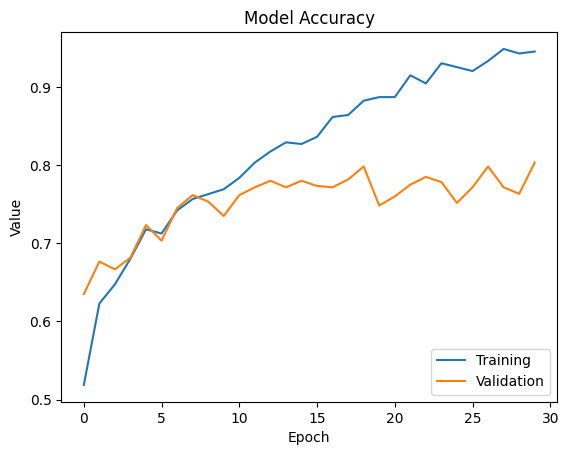

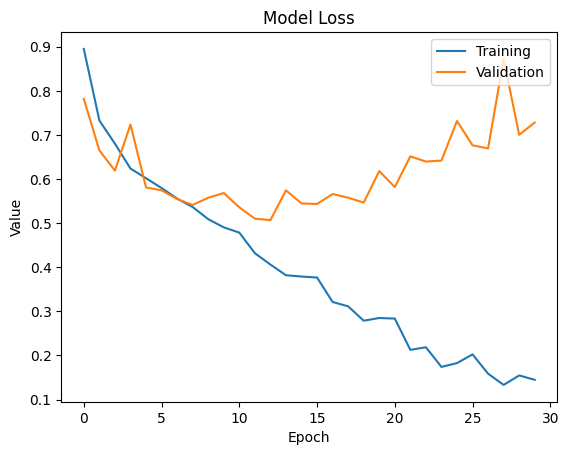

In [86]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

###Menyimpan model ke dalam format TF-Lite

In [87]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [88]:
with tf.io.gfile.GFile('animal_model.tflite', 'wb') as f:
    f.write(tflite_model)